## Object-Recognition-2D-CNN

An image classifier built upon a 2D CNN model using the Cifar10 dataset.

In [2]:
!pip install tensorflow-gpu==2.2.0
!pip install mlxtend

     |████████████████████████████████| 516.2MB 32kB/s 


### Import Libraries

In [0]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

### Load Cifar10 Dataset

In [0]:
from tensorflow.keras.datasets import cifar10

In [45]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
classes_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog','horse', 'ship', 'truck']
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


### Preprocess Data

In [46]:
x_train = x_train/255
x_test = x_test/255


(50000, 32, 32, 3)


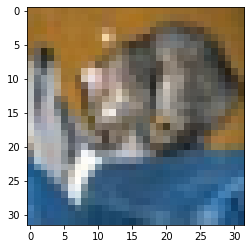

In [47]:
plt.imshow(x_test[0])

### Building CNN Model

In [58]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=[32,32,3]))

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])


In [62]:
history = model.fit(x=x_train, y=y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test, y_test)) 

Epoch 1/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.7568 - sparse_categorical_accuracy: 0.7330 - val_loss: 0.9086 - val_sparse_categorical_accuracy: 0.6854
Epoch 2/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.7033 - sparse_categorical_accuracy: 0.7505 - val_loss: 0.9845 - val_sparse_categorical_accuracy: 0.6625
Epoch 3/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.6611 - sparse_categorical_accuracy: 0.7662 - val_loss: 0.9079 - val_sparse_categorical_accuracy: 0.6940
Epoch 4/10
5000/5000 [==============================] - 19s 4ms/step - loss: 0.6182 - sparse_categorical_accuracy: 0.7807 - val_loss: 0.9155 - val_sparse_categorical_accuracy: 0.6936
Epoch 5/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.5805 - sparse_categorical_accuracy: 0.7939 - val_loss: 0.9419 - val_sparse_categorical_accuracy: 0.6918
Epoch 6/10
5000/5000 [==============================] - 18s 4ms/step - loss: 0.5592 -

### Plot Learning Curve

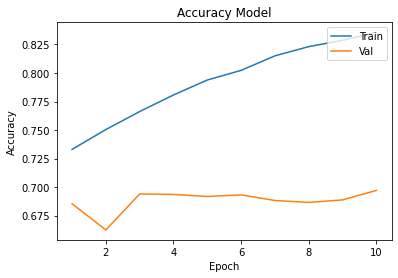

In [63]:
epoch_range = range(1,11)
plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
plt.title("Accuracy Model")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

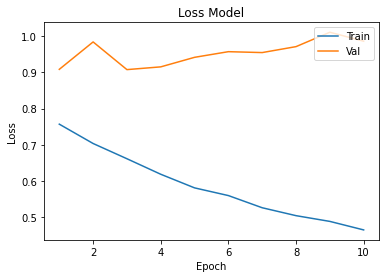

In [64]:
epoch_range = range(1,11)
plt.plot(epoch_range, history.history['loss'])
plt.plot(epoch_range, history.history['val_loss'])
plt.title("Loss Model")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")
plt.show()

### Plot Confusion Matrix

In [66]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0d880ae908>)

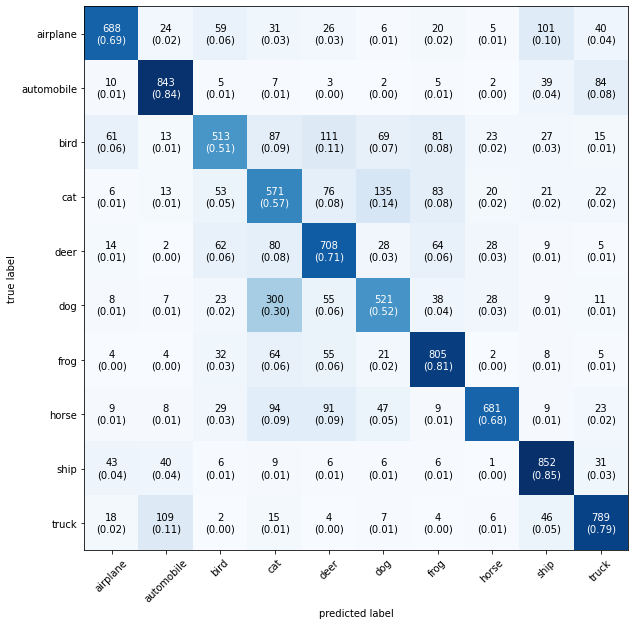

In [71]:
mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(mat, figsize=(10,10), class_names=classes_name, show_normed=True)